# Forecasting on Hawaii COVID Cases 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
#Read CSV File
df = pd.read_csv('daily_data.csv', parse_dates = ['date'])

#Rename columns
df.rename(columns = {'date':'Date', 'positiveIncrease':'New Cases','deathIncrease':'Deaths'}, inplace = True )

#Create dataframe to use
df = df[['Date','New Cases','Deaths']]
print(df)

          Date  New Cases  Deaths
0   2020-07-28         28       0
1   2020-07-27         63       0
2   2020-07-26         71       0
3   2020-07-25         59       0
4   2020-07-24         55       1
..         ...        ...     ...
139 2020-03-11          0       0
140 2020-03-10          0       0
141 2020-03-09          1       0
142 2020-03-08          0       0
143 2020-03-07          0       0

[144 rows x 3 columns]


### General Graphs and Statistics

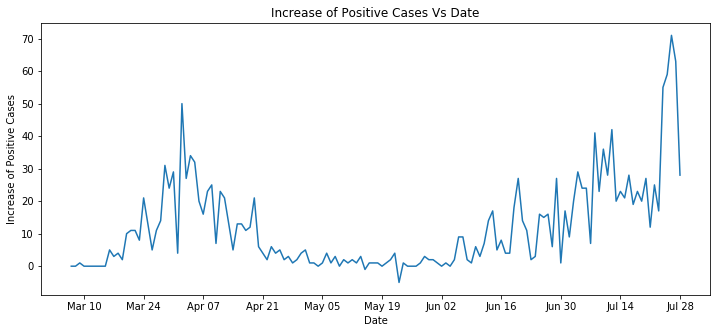

In [3]:
#Plot graph of Date v. New Cases

#Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(df['Date'], df['New Cases'], label = 'original')

#Set labels
ax.set(xlabel ='Date', ylabel ='Increase of Positive Cases', 
       title ='Increase of Positive Cases Vs Date') 

#Formats date labels to abbreviated month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Set x-axis tick frequency to every 2 weeks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 2))
plt.show()

In [4]:
#General Stats
df.describe()

,New Cases,Deaths
count,144.00000,144.000000
mean,11.87500,0.180556
std,13.85281,0.482603
min,-5.00000,0.000000
25%,1.75000,0.000000
50%,6.00000,0.000000
75%,20.00000,0.000000
max,71.00000,3.000000


### [Simple Moving Average (SMA)](https://www.datacamp.com/community/tutorials/moving-averages-in-pandas)

Uses sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous *n* data.

In [5]:
#Implements pandas rolling function to calculate simple moving average
df['pandas_SMA_3']= df.iloc[:,1].rolling(window=3).mean()
df['pandas_SMA_5']= df.iloc[:,1].rolling(window=5).mean()

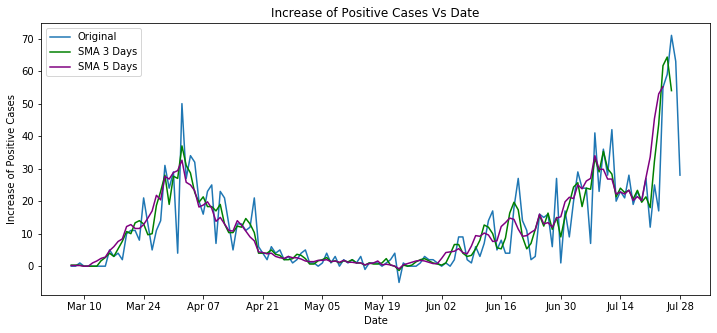

In [6]:
#Plot graph of Date v. New Cases with SMA model

#Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))

plt.plot(df['Date'], df['New Cases'], label = 'Original')
plt.plot(df['Date'], df['pandas_SMA_3'], label = 'SMA 3 Days', color = 'green')
plt.plot(df['Date'], df['pandas_SMA_5'], label = 'SMA 5 Days', color = 'purple')
plt.legend(loc = 2)

#Set labels
ax.set(xlabel ='Date', ylabel ='Increase of Positive Cases', title ='Increase of Positive Cases Vs Date') 

#Formats date labels to abbreviated month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Set x-axis tick frequency to every 2 weeks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 2))

plt.show()

### [Single Exponential Smoothing (SES)](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)

Requires a single parameter, *alpha (a)*, also known as the smoothing factor. This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. 

Alpha is usually set to a value between 0 and 1. Large values means the model pays attention mainly to the most recent observations, whereas smaller values means the model takes more of the history in to account.

SES is good for data with no trend and no seasonality. Holt's Exponential Smoothing is good for data with a trend, but no seasonality. Winter's Exponential Smoothing is good for data with a trend and seasonality.

Parameters: 
- **Alpha**: Smoothing factor

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [8]:
#Prep data into array
data = np.asarray(df['New Cases'])[::-1]
index = pd.date_range(start = '2020-03-07', end = '2020-07-28', freq = 'D')
casesdata = pd.Series(data, index)

C:\Users\Celine\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


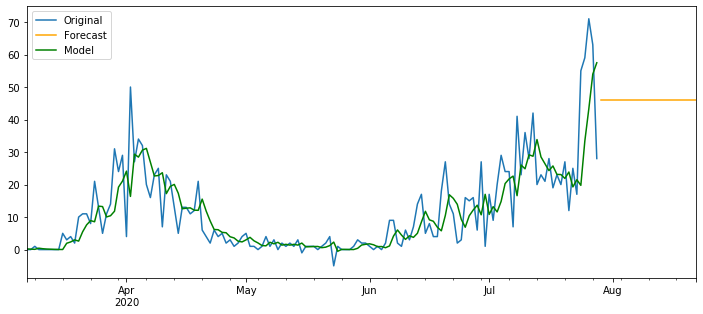

In [12]:
#Simple Exponential Smoothing 
fit1 = SimpleExpSmoothing(casesdata).fit()

#Forecasts future 25 days
fcast1 = fit1.forecast(25)

#Plot graph
ax = casesdata.plot(label = 'Original', figsize = (12,5))
fcast1.plot(ax = ax, label = 'Forecast', color = 'orange')
fit1.fittedvalues.plot(ax = ax,  label = 'Model', color = 'green')
plt.legend(loc = 2)
plt.show()

C:\Users\Celine\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


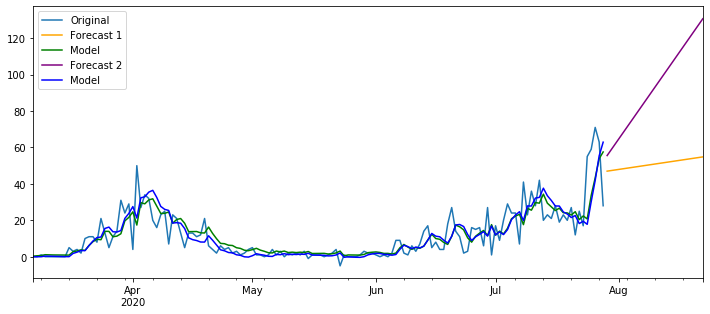

In [11]:
#Holt's Method for Exponential Smoothing

#Optimized model
fit2 = Holt(casesdata).fit()

#Forecasts future 25 days
fcast2 = fit2.forecast(25)

#Model with a set smoothing factor 
fit3 = Holt(casesdata).fit(smoothing_level = 0.3, smoothing_slope = 0.2, optimized = False)

#Forecasts future 25 days
fcast3 = fit3.forecast(25)

#Plot graph
ax = casesdata.plot(label = 'Original', figsize = (12,5))
fcast2.plot(ax = ax, label = 'Forecast 1', color = 'orange')
fit2.fittedvalues.plot(ax = ax,  label = 'Model', color = 'green')
fcast3.plot(ax = ax, label = 'Forecast 2', color = 'purple')
fit3.fittedvalues.plot(ax = ax,  label = 'Model', color = 'blue')
plt.legend(loc = 2)
plt.show()